# Hate Speech Detection

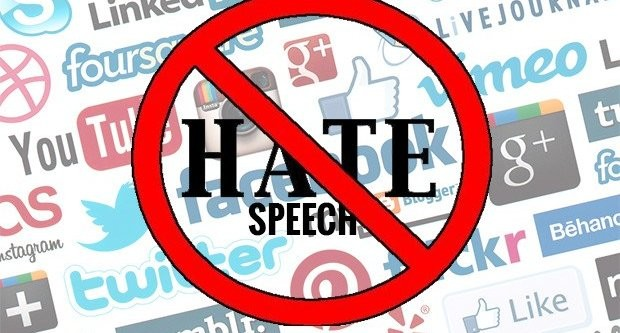

In [1]:
from PIL import Image
Image.open("./hatespeech.jpeg")

## Overview
<p>    The proliferation of social media has amplified the dissemination of hate speech,
 posing a significant threat to online communities. This paper addresses the critical task of automatically detecting hate speech within textual content. We explore the complexities of identifying hate speech, including its nuanced nature, evolving language, and potential overlap with other forms of offensive language. To tackle these challenges, we propose a comprehensive approach that combines advanced natural language processing techniques with machine learning algorithms. Our model is trained on a robust dataset and evaluated using rigorous metrics to assess its performance. By effectively detecting hate speech, we aim to contribute to a safer and more inclusive online environment.</p>

## Importing Modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,roc_curve
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import joblib
import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.tokenize import word_tokenize

## importing dataset


In [3]:
df = pd.read_csv("./HateSpeechDatasetBalanced.csv")

In [4]:
df.head(20)

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1
5,yeah retard haha,1
6,the ching chong chung stuff,1
7,the dead what a slut still warm when she tweet...,1
8,let your tweets be harmless it will not affect...,1
9,these latinos who have a problem with immigrat...,1


## Preprocessing

In [5]:
# checing for null values
df.isna().sum()

Content    0
Label      0
dtype: int64

In [6]:
# checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726119 entries, 0 to 726118
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Content  726119 non-null  object
 1   Label    726119 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ MB


In [7]:
# data descrition
df.describe()

,Label
count,726119.000000
mean,0.502018
std,0.499996
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
# number of Label data
print(df.Label.value_counts())

Label
1    364525
0    361594
Name: count, dtype: int64


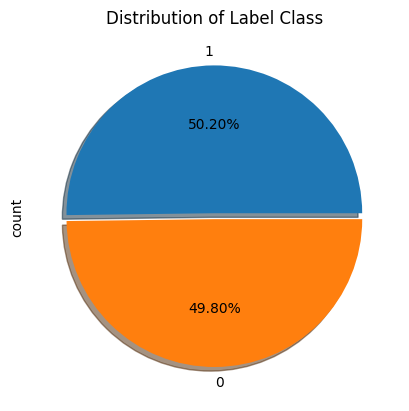

In [9]:
df.Label.value_counts().plot.pie(autopct = "%1.2f%%",shadow=True,explode=[0.02,0.02])
plt.title("Distribution of Label Class")
plt.show()

## EDA

In [10]:
# finding data with hate speech
hatedf = df[df.Label==1]["Content"]
# finding data with safe speech
safedf = df[df.Label==0]["Content"]

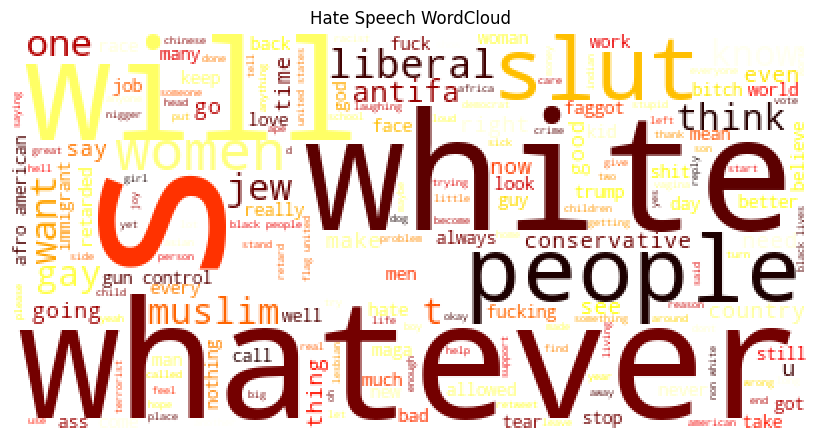

In [11]:
# plotting word cloud for hate speech
hateFlatten=""
for line in hatedf[:5000]:
    words = word_tokenize(str(line))
    strs = " ".join(words)
    hateFlatten+=" "+strs
hateImage = WordCloud(colormap="hot_r",background_color="white",stopwords=STOPWORDS).generate(hateFlatten)

plt.figure(figsize = (8, 8), facecolor = None)
plt.axis('off')
plt.imshow(hateImage)

plt.tight_layout(pad = 0)
plt.title("Hate Speech WordCloud")
plt.show()

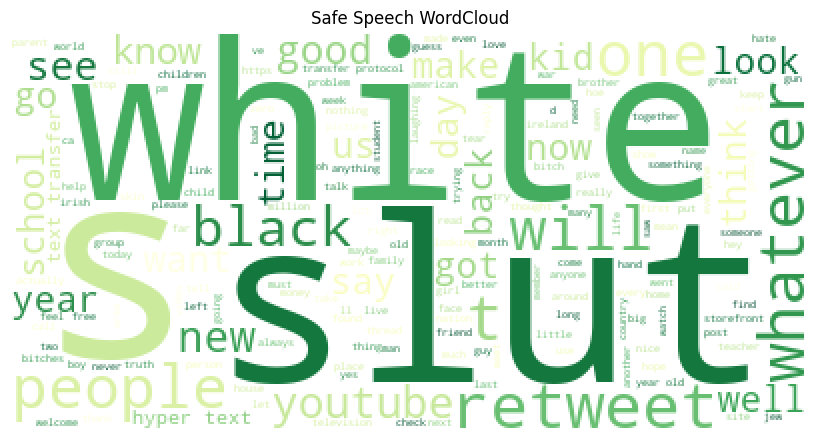

In [12]:
# plotting word cloud for safe speech
safeFlatten=""
for line in safedf[:5000]:
    words = word_tokenize(str(line))
    strs = " ".join(words)
    safeFlatten+=" "+strs
safeImage = WordCloud(colormap="YlGn",background_color="white",stopwords=STOPWORDS).generate(safeFlatten)

plt.figure(figsize = (8, 8), facecolor = None)
plt.axis('off')
plt.imshow(safeImage)

plt.tight_layout(pad = 0)
plt.title("Safe Speech WordCloud")
plt.show()


## Vectorization

In [13]:
h = pd.DataFrame({"Content":hatedf,"Label":np.ones(hatedf.size,dtype="int")})
s = pd.DataFrame({"Content":safedf,"Label":np.zeros(safedf.size,dtype="int")})
newdf = pd.concat([h,s])
newdf.reset_index(inplace=True)
newdf.drop(columns = ["index"],inplace=True)
feature=df.Content
target = df.Label
newdf

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1
...,...,...
726114,crash another movie from left field i have to ...,0
726115,i why do not you debate first before starting ...,0
726116,removal of i reverted the removal of the above...,0
726117,i have unblocked you eddie as i discussed on u...,0


In [14]:
vectorizer = TfidfVectorizer()
vectorized = vectorizer.fit_transform(feature)

## Feature Scalling with Standard Scaler

In [15]:
scale = MaxAbsScaler()
scaledVec = scale.fit_transform(vectorized)

## Train Test Split

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(scaledVec,target,test_size=0.25,random_state=1)

## Training with Multinomial NB

Accuracy Score: 0.8177656585688315
F1 Score: 0.83066732868894


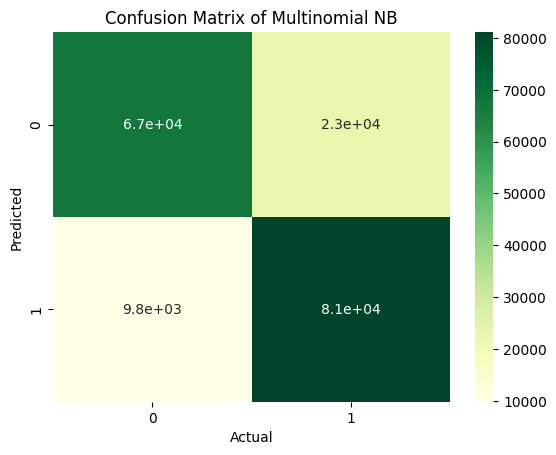

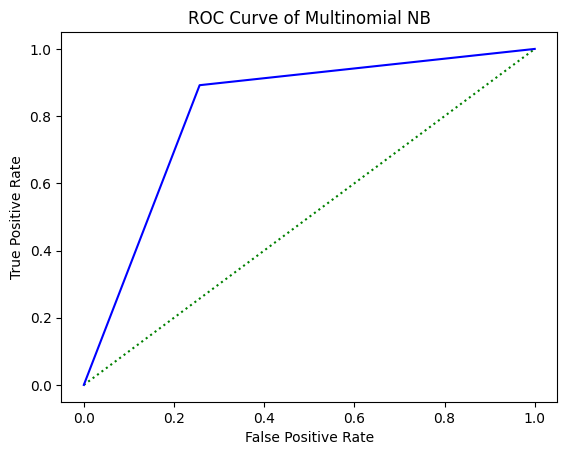

In [17]:
nbModel = MultinomialNB()
nbModel.fit(xtrain,ytrain)
print("Accuracy Score:",accuracy_score(ytest,nbModel.predict(xtest)))
print("F1 Score:",f1_score(ytest,nbModel.predict(xtest)))

cm = confusion_matrix(ytest,nbModel.predict(xtest))
sns.heatmap(cm,cmap="YlGn",annot=True)
plt.title("Confusion Matrix of Multinomial NB")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

fpr,tpr,thresh = roc_curve(ytest,nbModel.predict(xtest))
plt.plot([0,1],[0,1],":",color="g")
plt.plot(fpr,tpr,"-",color="b")
plt.title("ROC Curve of Multinomial NB")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Training with Logistic Regression

Accuracy Score: 0.8511485704842174
F1 Score: 0.8527714664007715


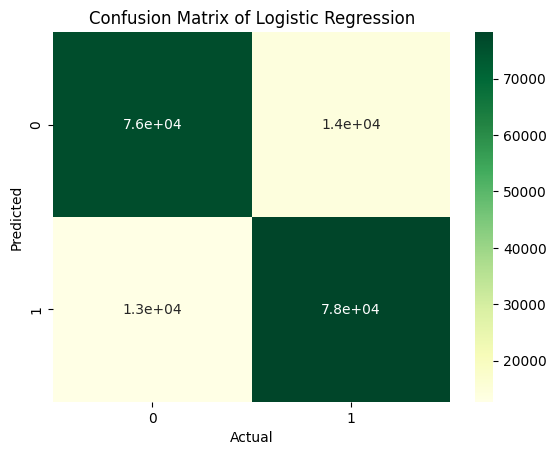

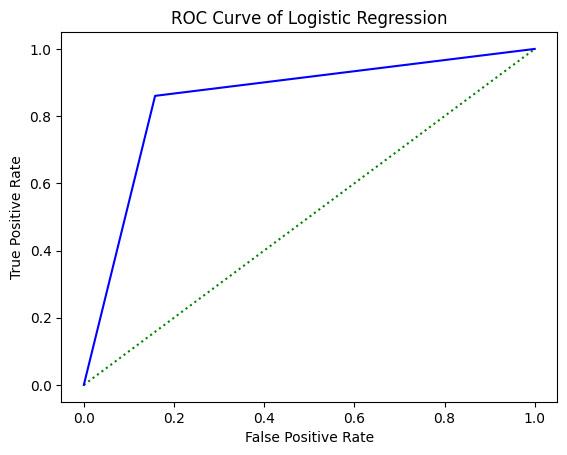

In [18]:
lrModel = LogisticRegression()
lrModel.fit(xtrain,ytrain)
print("Accuracy Score:",accuracy_score(ytest,lrModel.predict(xtest)))
print("F1 Score:",f1_score(ytest,lrModel.predict(xtest)))

cm = confusion_matrix(ytest,lrModel.predict(xtest))
sns.heatmap(cm,cmap="YlGn",annot=True)
plt.title("Confusion Matrix of Logistic Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

fpr,tpr,thresh = roc_curve(ytest,lrModel.predict(xtest))
plt.plot([0,1],[0,1],":",color="g")
plt.plot(fpr,tpr,"-",color="b")
plt.title("ROC Curve of Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## PipeLine using vectorizer, standard scaler and logistic regression

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(feature,target,test_size=0.25,random_state=1)

In [20]:
pipeModel = Pipeline([
    ("vectorizer",TfidfVectorizer()),
    ("scaler",MaxAbsScaler()),
    ("model",LogisticRegression())
])

In [21]:
pipeModel.fit(xtrain,ytrain)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('scaler', MaxAbsScaler()),
                ('model', LogisticRegression())])

In [23]:
print("Accuracy Score:",accuracy_score(ytest,pipeModel.predict(xtest)))
print("F1 Score:",f1_score(ytest,pipeModel.predict(xtest)))

Accuracy Score: 0.8534346939899741
F1 Score: 0.8552621557811361


## Saving model for future Work

In [24]:
joblib.dump(pipeModel,"hateSpeech.pkl")

['hateSpeech.pkl']

## Conclusion

<p>The use of the internet has shrunk the world. The evolution of social media plays an important role in connecting people. The communication between different states and countries has become so fast. In this communication, there is a chance of spreading hate speech, which can promote a conflict. To find out the hate speech and eliminate the content from the internet, machine learning models play a huge role. Manual detection and elimination are almost impossible. So the use of the ML model, which has trained over 7+ lakh data points, is appropriate while finding hate speech.</p>